3. Array aggregation functions [NUMPY]

In [2]:
import numpy as np
a =np.array(np.random.randint(25,45,size=10))
print(a);print()
print("The sum of the array elements is ",np.sum(a)) 
print("Product of the numbers in the array is ",np.prod(a))
print("The average of the numbers in the array is ",np.mean(a))
print("The Standard Deviation of the numbers in the array is ",np.std(a))
print("Maximum value in the array is ",np.max(a))
print("Minimum value in the array is ",np.min(a))
print("The d/b the highest and lowest number in the array is ",np.ptp(a))
# Do the same of the following aggregate functions min, max, prod, std, var, mean, median,h


[27 37 38 25 25 25 25 26 32 33]

The sum of the array elements is  293
Product of the numbers in the array is  1025175680
The average of the numbers in the array is  29.3
The Standard Deviation of the numbers in the array is  4.960846701924985
Maximum value in the array is  38
Minimum value in the array is  25
The d/b the highest and lowest number in the array is  13


4. Vectorized operations using NUMPY

        Vectorize Sum

In [3]:
import numpy as np
import time

a = np.array(np.arange(500000))
b = np.array(np.arange(500000))

start =  time.time()
total_sum = a + b
end = time.time()
print("Time taken for the vectorized sum is ",end-start)
# print(total_sum)

start = time.time()
total_sum = 0
for i in range(len(a)):
    total_sum = total_sum + a[i] + b[i]
end = time.time()
print("Time taken for the manual total is ",end-start)
print(total_sum)


Time taken for the vectorized sum is  0.0009975433349609375
Time taken for the manual total is  0.1356351375579834
891396832


C:\Users\Admin\AppData\Local\Temp\ipykernel_9364\2138097483.py:16: RuntimeWarning: overflow encountered in scalar add
  total_sum = total_sum + a[i] + b[i]


        Vectorized Product

In [4]:
import numpy as np
import time

a = np.array(np.arange(5000000))
b = np.array(np.arange(5000000))

start =  time.time()
total_prod = a*b
end = time.time()
print("Time taken for the vectorized product is ",end - start)

start = time.time()
total_prod = 1
for i in range(len(b)):
    total_prod = total_prod * a[i] * b[i]
end = time.time()
print("Time taken for the manual product is ",end-start)

Time taken for the vectorized product is 

 0.007979154586791992
Time taken for the manual product is  1.3948545455932617


5. Use Map, Filter, Reduce and Lambda functions on list using Numpy

In [5]:
import numpy as np
from functools import reduce

a = [25,14,36,94,54]
arr = np.array(a)
squaring = list(map(lambda i : i**2 , arr))
sorting = list(filter(lambda i : i % 2 == 0 , arr))
print("Original array",arr)
print("After squaring for the array",squaring)
print("After sorting the array with even elements ",sorting)
print("Using reduce function for making sum ",reduce(lambda a,b:a+b,arr))

Original array [25 14 36 94 54]
After squaring for the array [625, 196, 1296, 8836, 2916]
After sorting the array with even elements  [14, 36, 94, 54]
Using reduce function for making sum  223


6. Using aggregation functions on a DataFrame

In [6]:
import pandas as pd
df = pd.DataFrame([
                    [4,5,6],
                    [1,2,3],
                    [7,8,9]],
                    columns=['Math','Science','Social'])

df.agg(['sum','mean','min','max','std','var','count','median'])

,Math,Science,Social
sum,12.0,15.0,18.0
mean,4.0,5.0,6.0
min,1.0,2.0,3.0
max,7.0,8.0,9.0
std,3.0,3.0,3.0
var,9.0,9.0,9.0
count,3.0,3.0,3.0
median,4.0,5.0,6.0


7. Grouping using Pandas on a DataFrame


In [7]:
import pandas as pd
d = {
    'Courses' : ['a','b','c','a'],
    'Fees' : [200,300,500,100]}

df = pd.DataFrame(d)
print(df)
df.groupby('Courses').agg({'Fees':'sum'})

  Courses  Fees
0       a   200
1       b   300
2       c   500
3       a   100


,Fees
Courses,
a,300
b,300
c,500


8. Pivot and Melt functions on a DataFrame

In [14]:
import pandas as pd
d = {
    'Courses' : ['a','b','c','a'],
    'Fees' : [200,300,500,100]}

df = pd.DataFrame(d)
print(df)
print()
print(df.pivot(columns='Courses',values='Fees'))
print()
print(df.melt(var_name='Variabless',value_name='Valuess'))

  Courses  Fees
0       a   200
1       b   300
2       c   500
3       a   100

Courses      a      b      c
0        200.0    NaN    NaN
1          NaN  300.0    NaN
2          NaN    NaN  500.0
3        100.0    NaN    NaN

  Variabless Valuess
0    Courses       a
1    Courses       b
2    Courses       c
3    Courses       a
4       Fees     200
5       Fees     300
6       Fees     500
7       Fees     100


9. Use Map, Filter and Reduce, Lambda functions using Pandas[DataFrames]

In [9]:
import pandas as pd
from functools import reduce

d = {
    'Courses' : ['a','b','c','a'],
    'Fees' : [200,300,500,100]}
df = pd.DataFrame(d)
# df['Fees'] = list(map(lambda i : i + 2,df['Fees']))
print("After adding 2 using Map function ",list(map(lambda i : i + 2,df['Fees'])))
# print(df)
print("Filtering which is greater than 200 ",list(filter(lambda i : i > 200,df['Fees'])))
print("Making sum of the fees ",reduce(lambda i,j : i+j , df['Fees']))

After adding 2 using Map function  [202, 302, 502, 102]
Filtering which is greater than 200  [300, 500]
Making sum of the fees  1100


10. Time series using Pandas(resample,shift operations)

In [11]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
                    'Date' : pd.date_range(start='2023-08-3',periods=5),
                    'Temprature' : np.random.randint(20,40,size=5),
                    'Temprature' : np.array([21,32,26,35,38])                   #Here it is re-assigning the values 
                })

print(df)
print()
print()
df['previous_temp'] = df['Temprature'].shift(1)
# pd.to_numeric(df['previous_temp'])
print(df)
print()
print()

print(df.resample('w',on='Date').mean())

        Date  Temprature
0 2023-08-03          21
1 2023-08-04          32
2 2023-08-05          26
3 2023-08-06          35
4 2023-08-07          38


        Date  Temprature  previous_temp
0 2023-08-03          21            NaN
1 2023-08-04          32           21.0
2 2023-08-05          26           32.0
3 2023-08-06          35           26.0
4 2023-08-07          38           35.0


            Temprature  previous_temp
Date                                 
2023-08-06        28.5      26.333333
2023-08-13        38.0      35.000000


11. Data visualization using Matplotlib

        Bar

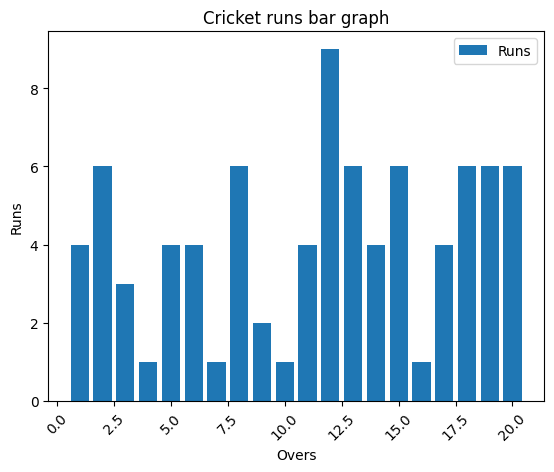

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\Cricket.csv")
plt.bar(df['over'],df['total_runs'],label='Runs')
plt.title("Cricket runs bar graph")
plt.xlabel('Overs')
plt.ylabel('Runs')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

        Pie
        

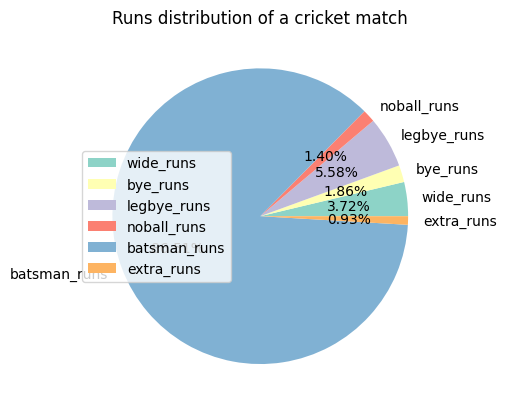

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\Cricket.csv")
runs = [8,4,12,3,186,2]
mode = ['wide_runs','bye_runs','legbye_runs','noball_runs','batsman_runs','extra_runs']
plt.pie(runs, labels=mode , startangle=0, autopct='%0.2f%%',colors=sns.color_palette("Set3"))
# plt.xlabel('kekk')
plt.title('Runs distribution of a cricket match')
plt.legend()
plt.show()

        Line Graph

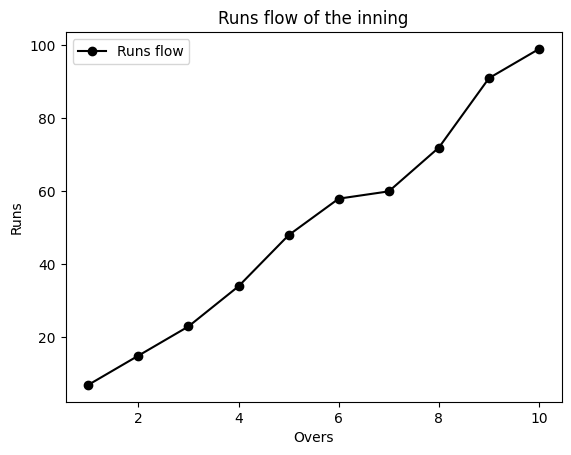

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\Cricket.csv")
overs = [1,2,3,4,5,6,7,8,9,10]
total_runs = [7,15,23,34,48,58,60,72,91,99]
plt.plot(overs,total_runs,'o-k',label='Runs flow')
plt.xlabel('Overs')
plt.ylabel("Runs")
# plt.xticks(rotation = 25)
plt.title('Runs flow of the inning')
plt.legend()
plt.show()


        Histogram
        

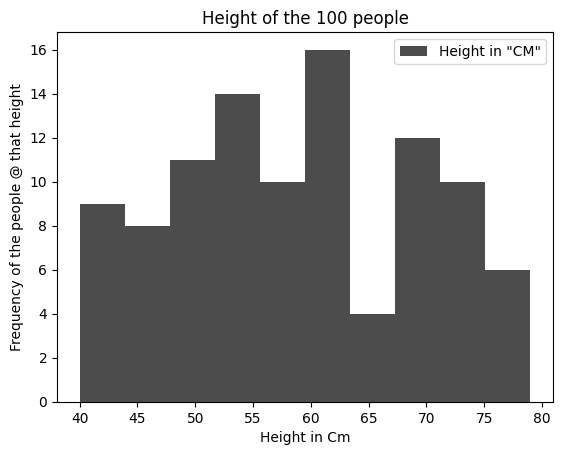

In [14]:
import matplotlib.pyplot as plt
# import pandas as pd
import numpy as np

data = np.random.randint(40,80,size=100)
plt.hist(data,color='k',label='Height in "CM"',alpha=.7)
plt.xlabel('Height in Cm')
plt.ylabel('Frequency of the people @ that height')
plt.title("Height of the 100 people")
plt.legend()
plt.show()

        Scatter Plot
        

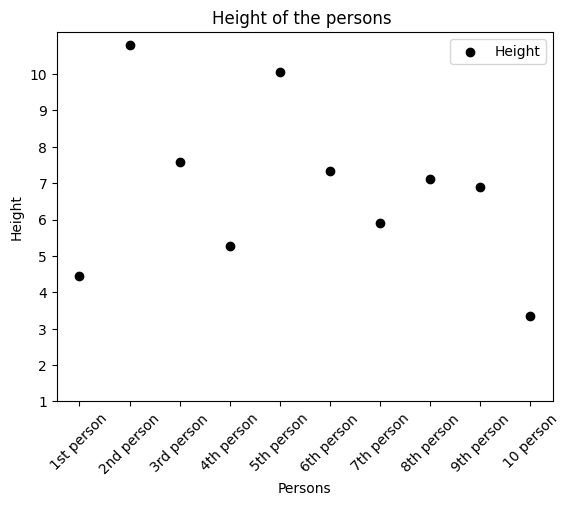

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

persons = np.arange(1,11)
heights = np.random.random(10)
# print(type(heights))
plt.scatter(persons,heights,color='black',label='Height')
plt.title('Height of the persons ')
plt.xticks(rotation = 45)
plt.xticks([1,2,3,4,5,6,7,8,9,10],['1st person','2nd person','3rd person','4th person','5th person','6th person','7th person','8th person','9th person','10 person'])
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],[1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Persons')
plt.ylabel('Height')
plt.legend()
plt.show()


12. Visualization of time series data using temprature on different days

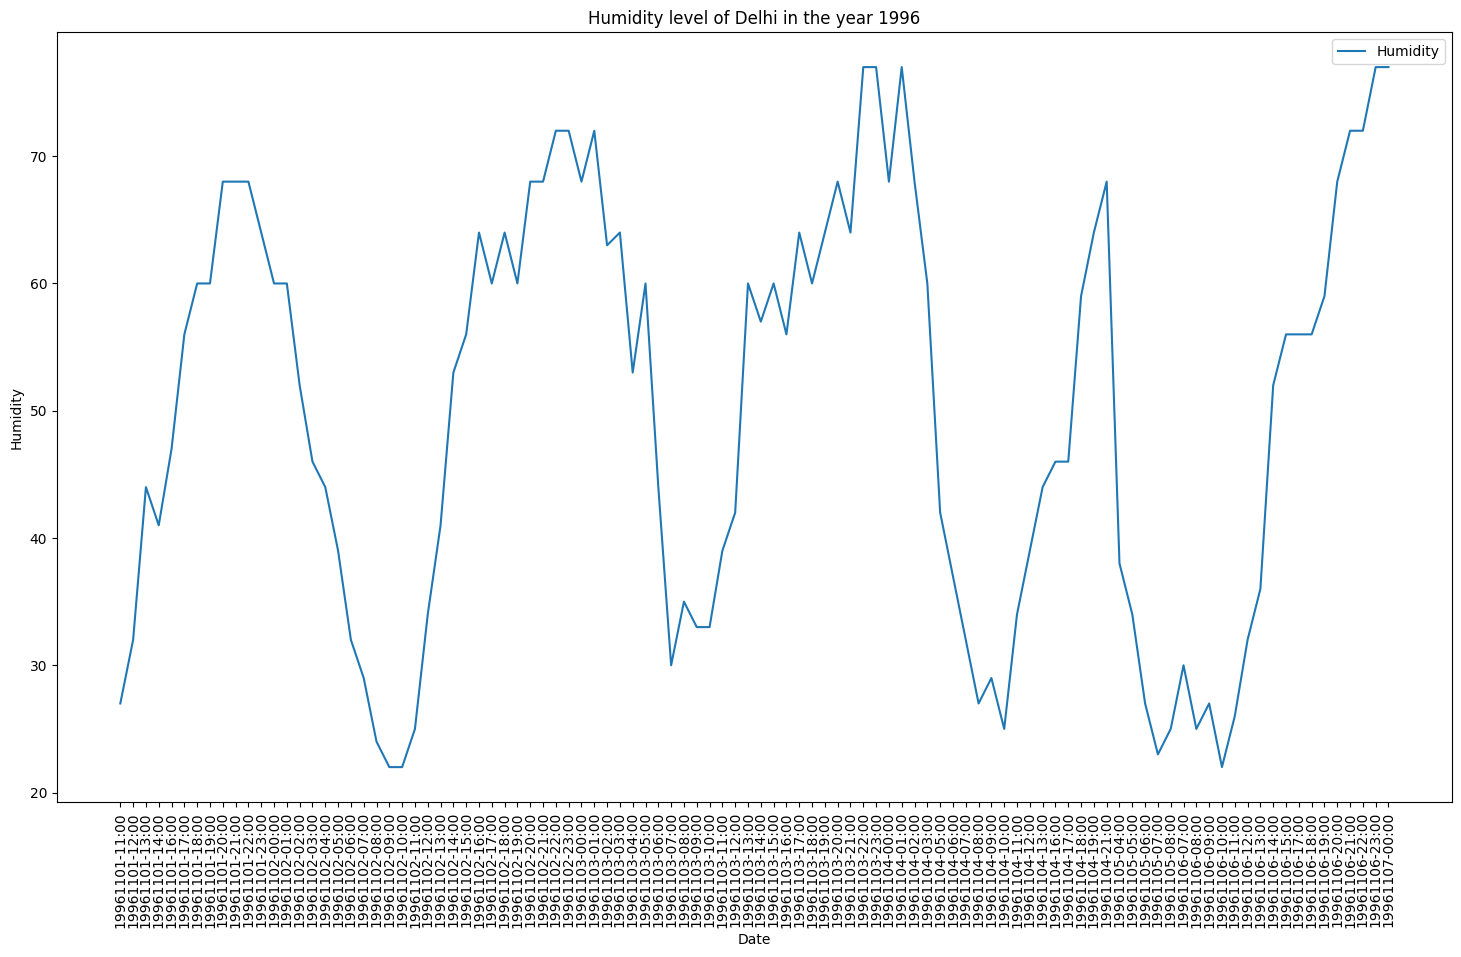

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\temprature.csv")

plt.figure(figsize=(18,10))
plt.plot(data['datetime_utc'],data['humidity'],label='Humidity')
plt.xlabel("Date")
plt.ylabel("Humidity")
plt.title("Humidity level of Delhi in the year 1996")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

13. Visualization of Iris-Dataset using Scatter plot


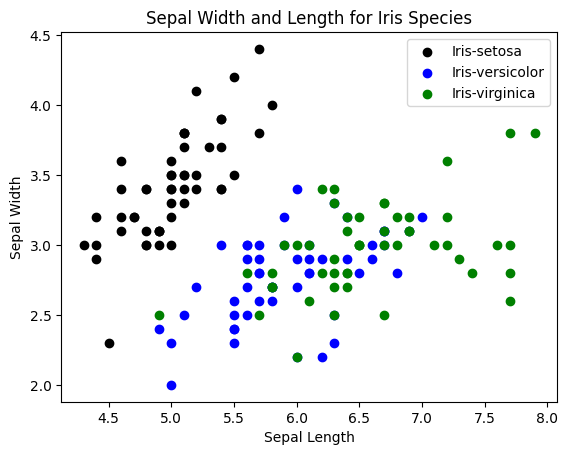

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\iris.csv")
species_color = {'Iris-setosa' : 'k', 'Iris-versicolor' : 'b' , "Iris-virginica" : 'g'}

for i,j in species_color.items():
    sl = data[data['species'] == i]['sepal_length']
    sw = data[data['species'] == i]['sepal_width']
    plt.scatter(sl, sw,color=j,label=i)
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width and Length for Iris Species')
plt.show()

14. Visualization of Iris-dataset using Pie chart

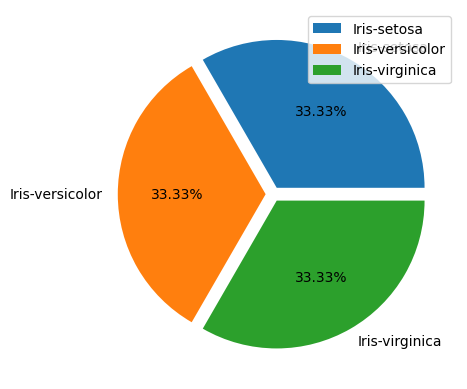

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\iris.csv")
count = data['Species'].value_counts()
plt.pie(count,labels= count.index,explode=[0.05,0.05,0.05],autopct="%.2f%%")
plt.legend()
plt.show()

15.Visualization of Titanic-dataset using Histogram

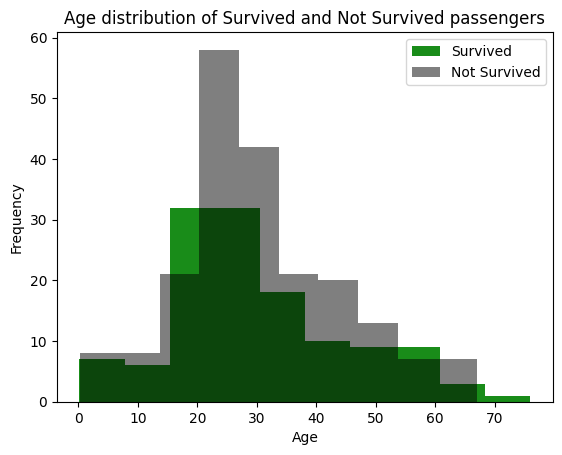

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data  = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\titanic.csv")

survived = data[data['Survived']==1]['Age']
not_survived = data[data['Survived']==0]['Age']

plt.hist(survived,alpha = 0.9,color = 'green',label='Survived')
plt.hist(not_survived,alpha = 0.5 , color='black' ,label='Not Survived')
plt.title("Age distribution of Survived and Not Survived passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

16.Visualization of Titanic-dataset using bar chart

3    218
1    107
2     93
Name: Pclass, dtype: int64


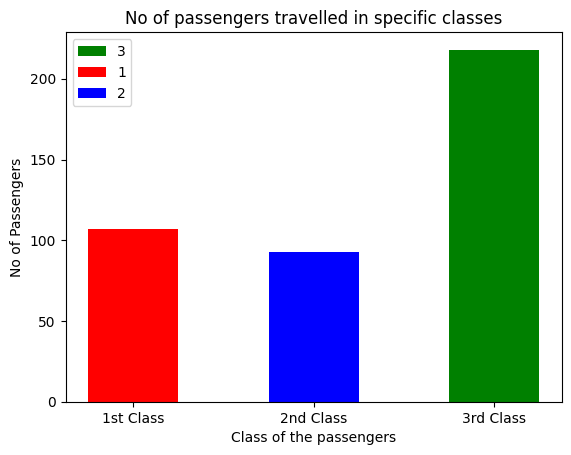

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data  = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\titanic.csv")

count = data['Pclass'].value_counts()
print(count)

plt.bar(count.index,count.values,color=['green','red','blue'],width=.5,label=['3','1','2'])
plt.xlabel('Class of the passengers')
plt.ylabel('No of Passengers')
plt.xticks([1,2,3],['1st Class','2nd Class','3rd Class'])
plt.title("No of passengers travelled in specific classes")
plt.legend()
plt.show()

17. Visualize Employee dataset using Line graph [Represent Salary and Experience]

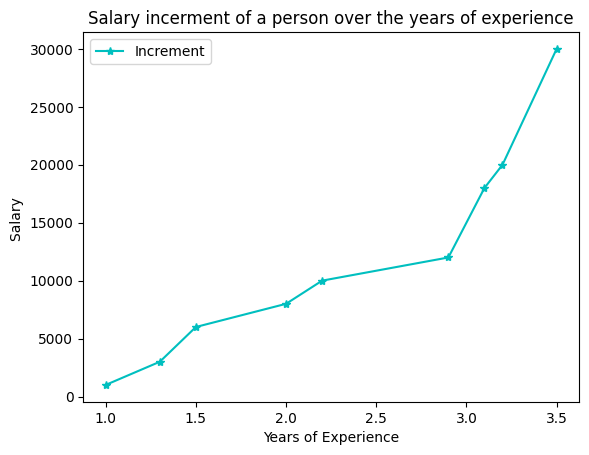

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# data  = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\salary.csv")
d ={"Experience_Years":[1,1.3,1.5,2,2.2,2.9,3.1,3.2,3.5],
    "Salary":[1000,3000,6000,8000,10000,12000,18000,20000,30000]}
data = pd.DataFrame(d)
plt.plot(data['Experience_Years'],data['Salary'],'*-c',label='Increment')
plt.xlabel('Years of Experience')
plt.ylabel("Salary ")
plt.title("Salary incerment of a person over the years of experience")
plt.legend()
plt.show()

18 .Visualize Iris dataset using Box-Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


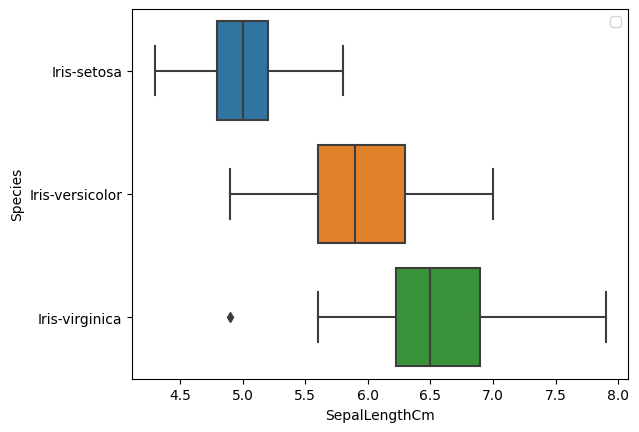

In [ ]:
import seaborn as s
import pandas as pd
import matplotlib.pyplot as p

d=pd.read_csv('C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\iris.csv')
# print(d['SepalLengthCm'])
# print(d['Species'])
s.boxplot(x=d['SepalLengthCm'],y=d['Species'])
p.legend()
p.show()

19.    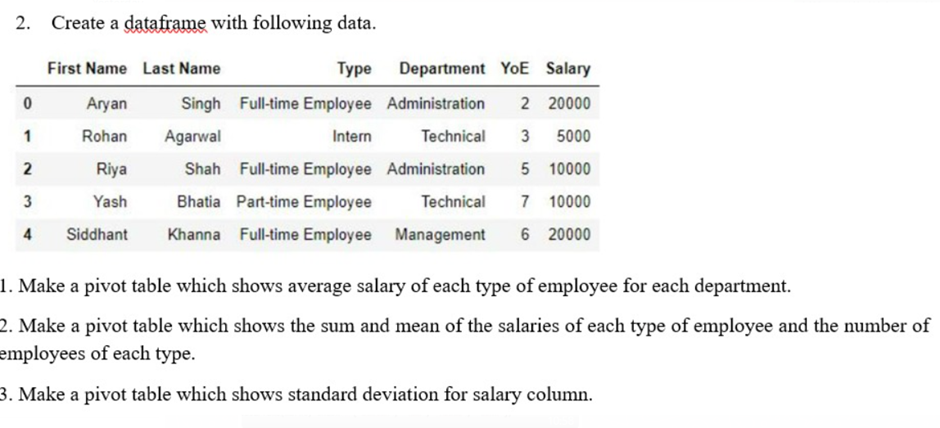

In [ ]:
import pandas as pd
import numpy as np

data = {
        'First Name' : ['Aryan','Rohan','Riya','Yash','Siddhant'],
        'Last Name' : ['Singh','Agarwal','Shah','Bhatia','Khanna'],
        'Type' : ['FT','Intern','FT','PT','FT'],
        'Department' : ['Administration','Technical','Administration','Technical','Managment'],
        'YoE' : [2,3,5,7,6],
        'Salary' : [20000,5000,10000,10000,20000]
}

df = pd.DataFrame(data)
a = df.pivot_table(index=['Type','Department'],values=['Salary','YoE'],aggfunc=['mean','sum'])
print(a)
print()
b = df.pivot_table(index=['Type','Department'],values='Salary',aggfunc=['sum','mean','count'])
print(b)
print()
c =  df.pivot_table(index=['Type','Department'],values='Salary',aggfunc='std')
print(c)

                        mean         sum    
                      Salary  YoE Salary YoE
Type   Department                           
FT     Administration  15000  3.5  30000   7
       Managment       20000  6.0  20000   6
Intern Technical        5000  3.0   5000   3
PT     Technical       10000  7.0  10000   7

                         sum   mean  count
                      Salary Salary Salary
Type   Department                         
FT     Administration  30000  15000      2
       Managment       20000  20000      1
Intern Technical        5000   5000      1
PT     Technical       10000  10000      1

                          Salary
Type Department                 
FT   Administration  7071.067812


20. 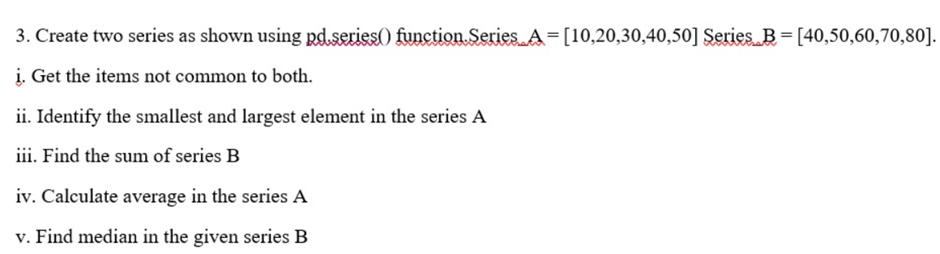

In [ ]:
import pandas as pd
import numpy as np
a = [10,20,30,40,50]
b = [40,60,70,50,80]
s_a = pd.Series(a)
s_b = pd.Series(b)
set_a = set(a)
set_b = set(b)
print(type(a))
type(a)
print(set_a)
print(set_b)
print("Non common elements in both the series are ",set_a.symmetric_difference(set_b))
# print("Non common elements in both the series are ",s_a[~s_a.isin(s_b)].tolist() + s_b[~s_b.isin(s_a)].tolist())
print("Smallest and the largest element in the Series A is ",np.min(s_a),np.max(s_a))
print("The sum of the elements of the series B is ",sum(s_b))
print('The average of the Series A is ',np.mean(s_a))
print("The median value in the Series B is ",np.median(s_b))

<class 'list'>
{40, 10, 50, 20, 30}
{70, 40, 80, 50, 60}
Non common elements in both the series are  {80, 20, 70, 10, 60, 30}
Smallest and the largest element in the Series A is  10 50
The sum of the elements of the series B is  300
The average of the Series A is  30.0
The median value in the Series B is  60.0


21. Perform the following operations on Car manufacturing company dataset auto-
mpg.csv given below using pandas
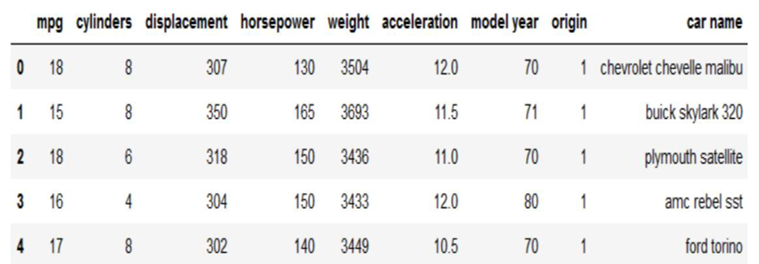

i. statistical details of dataset

ii. Get all cars with 8 cylinders

iii. Get the number of cars manufactured in each year.



In [ ]:
import pandas as pd
da={
    "mpg":[18,15,18,16,17],"cylinders":[8,8,6,4,8],"displacement":[307,350,318,304,302],
    "horsepower":[130,165,150,150,140],"weigth":[3504,3693,3436,3433,3449],
    "acceleration":[12.0,11.5,11.0,12.0,10.5],"model year":[70,71,70,80,70],
    "origin":[1,1,1,1,1],"car name":["cheverlot","buick","plymoth","amc","ford"]

}
df=pd.DataFrame(da)

sa=df.describe()
ei=df[df["cylinders"]==8]
ye = df.groupby('model year')["model year"].count()

print("Satistical:\n",sa)
print("\n8 cylinders:\n",ei)
print("\nBy year:\n",ye)


Satistical:
             mpg  cylinders  displacement  horsepower       weigth  \
count   5.00000   5.000000      5.000000    5.000000     5.000000   
mean   16.80000   6.800000    316.200000  147.000000  3503.000000   
std     1.30384   1.788854     19.879638   13.038405   110.006818   
min    15.00000   4.000000    302.000000  130.000000  3433.000000   
25%    16.00000   6.000000    304.000000  140.000000  3436.000000   
50%    17.00000   8.000000    307.000000  150.000000  3449.000000   
75%    18.00000   8.000000    318.000000  150.000000  3504.000000   
max    18.00000   8.000000    350.000000  165.000000  3693.000000   

       acceleration  model year  origin  
count       5.00000     5.00000     5.0  
mean       11.40000    72.20000     1.0  
std         0.65192     4.38178     0.0  
min        10.50000    70.00000     1.0  
25%        11.00000    70.00000     1.0  
50%        11.50000    70.00000     1.0  
75%        12.00000    71.00000     1.0  
max        12.00000    80.000

22. . Ramesh decides to walk 10000 steps every day to combat the effect that lockdown has had on his body’s agility, mobility, flexibility and strength. Consider the following data from fitness tracker over a period of 10 days

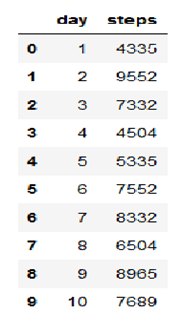

1.Code to add 1000 steps to all the observations 

2.Code to find out the days on which Ramesh walked more than 7000 steps 


In [ ]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
                    "day" : [1,2,3,4,5,6,7,8,9,10],
                    "steps" : [4335,9552,7332,4504,5335,7552,8332,6504,8965,7689]})

print(data)
print()
print()
data['steps'] = data['steps'] + 1000
# data['steps']+=1000
print(data)
print()
print()
print(data[data['steps']>7000])

   day  steps
0    1   4335
1    2   9552
2    3   7332
3    4   4504
4    5   5335
5    6   7552
6    7   8332
7    8   6504
8    9   8965
9   10   7689


   day  steps
0    1   5335
1    2  10552
2    3   8332
3    4   5504
4    5   6335
5    6   8552
6    7   9332
7    8   7504
8    9   9965
9   10   8689


   day  steps
1    2  10552
2    3   8332
5    6   8552
6    7   9332
7    8   7504
8    9   9965
9   10   8689


23. Data from an online platform has been collected. This data contains fuel consumption
and 11 aspects of automobile design and performance for 32 automobiles. Variable
description is given below.Dataset - ‘mtcars.csv'

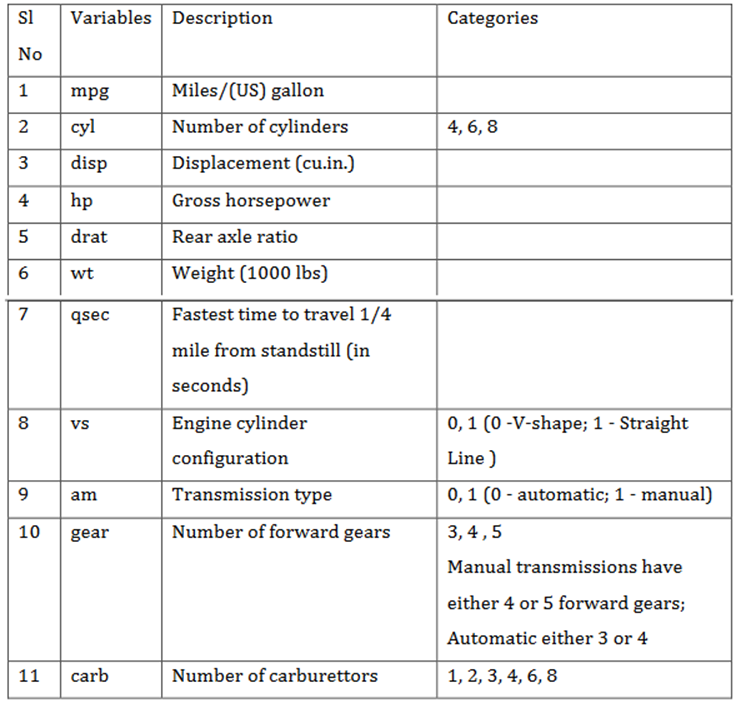


Create the following plots to visualize/summarize the data and customize appropriately.
1. histogram to check the frequency distribution of the variable ‘mpg’ (Miles per
gallon) and note down the interval having the highest frequency.
2. scatter plot to determine the relation between weight of the car and mpg
3. bar plot to check the frequency distribution of transmission type of cars.
4. Box and Whisker plot of mpg and interpret the five number summary.
5. Create a git repository and push source code to repo.




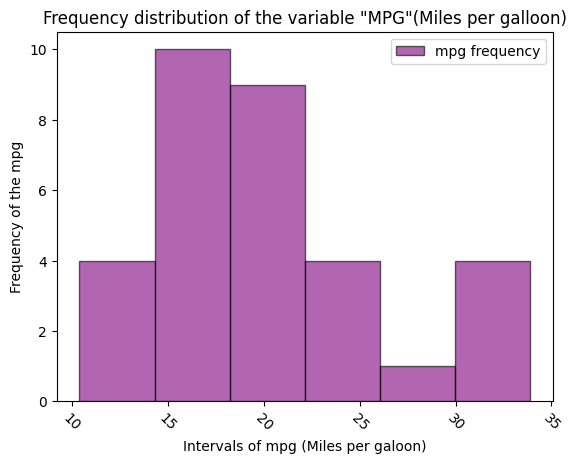

range(0, 32)
32


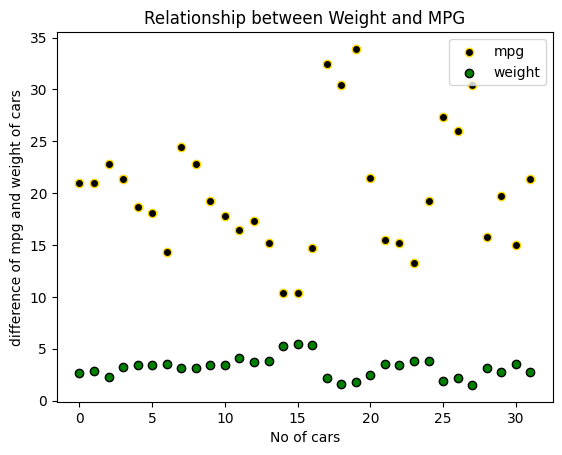

0    19
1    13
Name: am, dtype: int64


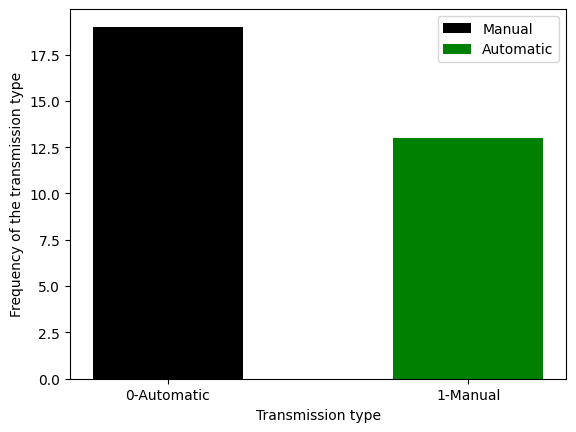

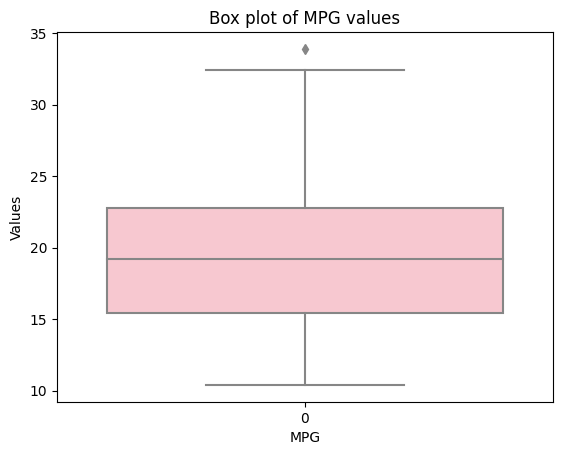

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s

data = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\mtcars.csv")
data

mpg = data['mpg']
plt.hist(mpg,alpha=0.6,color = "Purple",edgecolor = 'black',bins = 'auto',label='mpg frequency')
plt.ylabel('Frequency of the mpg')
plt.xticks(rotation = -45,)
# plt.xticks([12,15],['twelve','fifteen'])  If we put this it will show only this two...............
plt.xlabel('Intervals of mpg (Miles per galoon)')
plt.title('Frequency distribution of the variable "MPG"(Miles per galloon)')
plt.legend()
plt.show()

length = range(len(data))
weight = data['wt']
print(length)
print(len(weight))
plt.scatter(length,mpg,color = 'black',label='mpg',edgecolors='gold')
plt.scatter(length,weight,color = 'green' ,label='weight',edgecolors='black')
plt.xlabel('No of cars')
plt.ylabel("difference of mpg and weight of cars")
plt.legend()
plt.title("Relationship between Weight and MPG")
plt.show()

transmission = data['am'].value_counts()
print(transmission)
plt.bar(transmission.index,transmission.values,color=['black','green'],label=['Manual','Automatic'],width=.5)
plt.xticks([0,1],['0-Automatic','1-Manual'])
plt.legend()
plt.xlabel("Transmission type")
plt.ylabel("Frequency of the transmission type")
plt.show()

s.boxplot(mpg,color='pink')
plt.xlabel('MPG')
plt.ylabel("Values")
plt.title("Box plot of MPG values")
plt.show()

# s.histplot(data['mpg'],kde=True, color='purple' )
# plt.show()

Week 04

Linear algebra (Vector, Scalar, Tensors, Matrix, Gradient, Eigen values and vector)

In [ ]:
import numpy as np
import tensorflow as t

scalar=50
print("Scalar : ",scalar)

matrix=np.array([[0, 2],[2, 3]])
vector=np.array([1,21,25,31])
print("\nMatrix:\n",matrix)
print("\nVector:\n",vector)

print("\nTensor:")
fill_2d = t.fill([3, 4],1, '2d')
fill_string = t.fill([3,2], "punith", 'fill_tensor_string')
print("\nNumerics:\n",fill_2d)
print("\nString:\n",fill_string)

g=np.gradient(vector)
print("\nGradient:\n",g)

w,a = np.linalg.eig(matrix)
mat_norm = np.linalg.norm(matrix)
print("\nEigen values:\n",w)
print("\nEigen vectors:\n",a)
print("\nMatrix norm:", mat_norm)

Scalar :  50

Matrix:
 [[0 2]
 [2 3]]

Vector:
 [ 1 21 25 31]

Tensor:

Numerics:
 tf.Tensor(
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]], shape=(3, 4), dtype=int32)

String:
 tf.Tensor(
[[b'punith' b'punith']
 [b'punith' b'punith']
 [b'punith' b'punith']], shape=(3, 2), dtype=string)

Gradient:
 [20. 12.  5.  6.]

Eigen values:
 [-1.  4.]

Eigen vectors:
 [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]

Matrix norm: 4.123105625617661


Co-variance and Co-relation


In [ ]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width",])
# print(df)
# df["class"] = iris.target
cov=df.iloc[:, 0:4].cov()
cor=df.iloc[:, 0:4].corr()
# print(df)
print("Covariance:\n",cov)
print("\nCorelation:\n",cor)

Covariance:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006

Corelation:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


Univariate distribution plot & Multivariate distribution plot

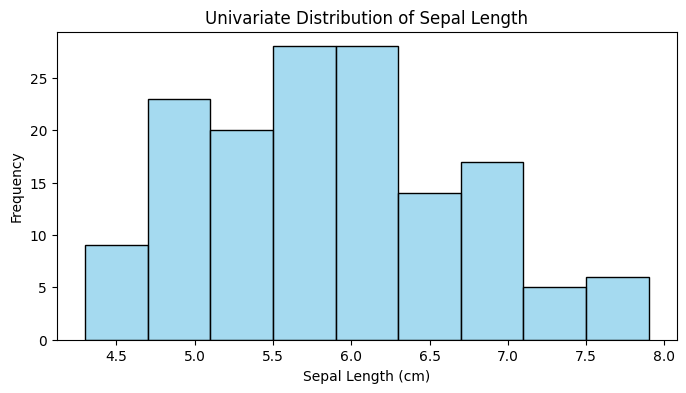

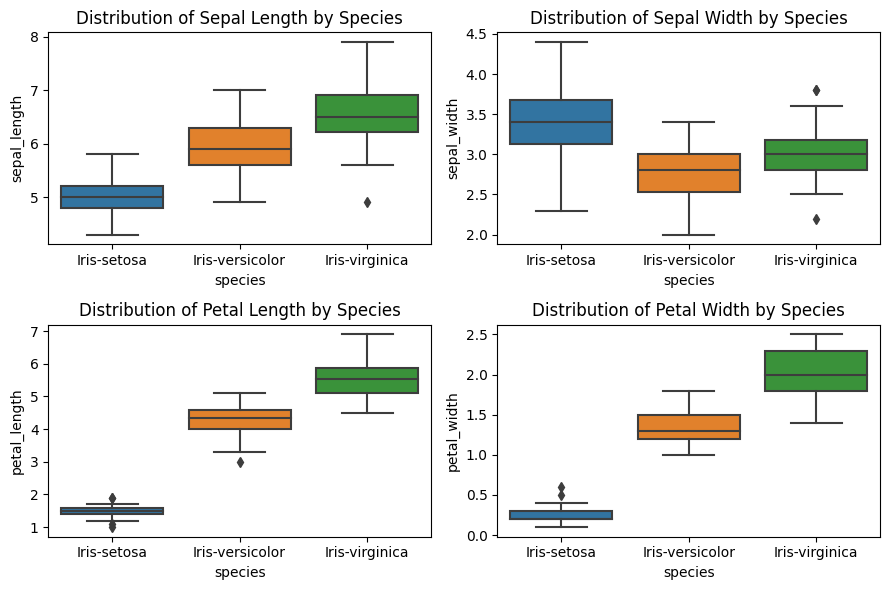

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\iris.csv")

#Univariate
sepal_length_data = iris["sepal_length"]

plt.figure(figsize=(8, 4))

sns.histplot(sepal_length_data, color="skyblue")
# plt.hist(sepal_length_data)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.title("Univariate Distribution of Sepal Length")
plt.show()

#Multivariate

# Create subplots for each numeric variable
fig, axes = plt.subplots(2, 2, figsize=(9, 6))

# Plot sepal length distribution by species
# sns.boxplot(x="species", y="sepal_length", data=iris, ax=axes[0, 0])
sns.boxplot(x=iris['species'],y=iris['sepal_length'],ax=axes[0,0])
axes[0, 0].set_title("Distribution of Sepal Length by Species")

# Plot sepal width distribution by species
sns.boxplot(x="species", y="sepal_width", data=iris, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Sepal Width by Species")

# Plot petal length distribution by species
sns.boxplot(x="species", y="petal_length", data=iris, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Petal Length by Species")

# Plot petal width distribution by species
sns.boxplot(x="species", y="petal_width", data=iris, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Petal Width by Species")

plt.tight_layout()
plt.show()

Univariate and Multivariate Comparision plot

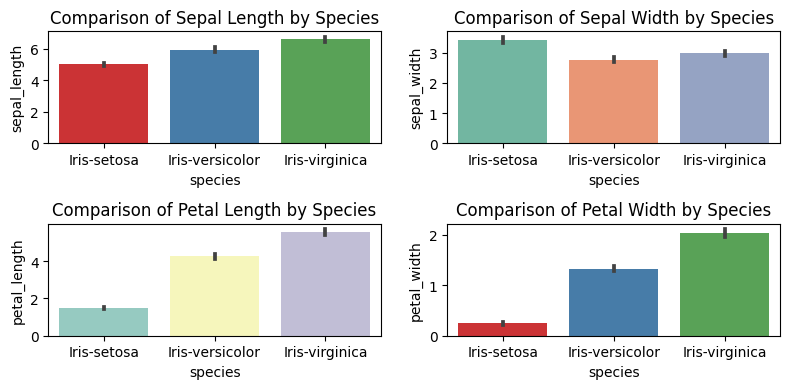

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\iris.csv")

# Set the figure size
plt.figure(figsize=(8, 4))

# Create grouped bar plots for sepal length, sepal width, petal length, and petal width by species
plt.subplot(2, 2, 1)
sns.barplot(x=iris["species"], y=iris["sepal_length"], palette="Set1")
plt.title("Comparison of Sepal Length by Species")

plt.subplot(2, 2, 2)
sns.barplot(x="species", y="sepal_width", data=iris, palette="Set2")
plt.title("Comparison of Sepal Width by Species")

plt.subplot(2, 2, 3)
sns.barplot(x="species", y="petal_length", data=iris, palette="Set3")
plt.title("Comparison of Petal Length by Species")

plt.subplot(2, 2, 4)
sns.barplot(x="species", y="petal_width", data=iris, palette="Set1")
plt.title("Comparison of Petal Width by Species")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Univariate and Multivariate composition plot

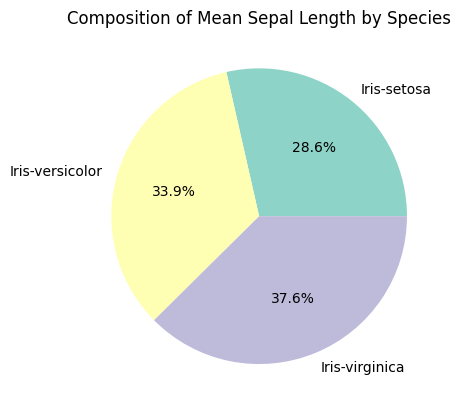

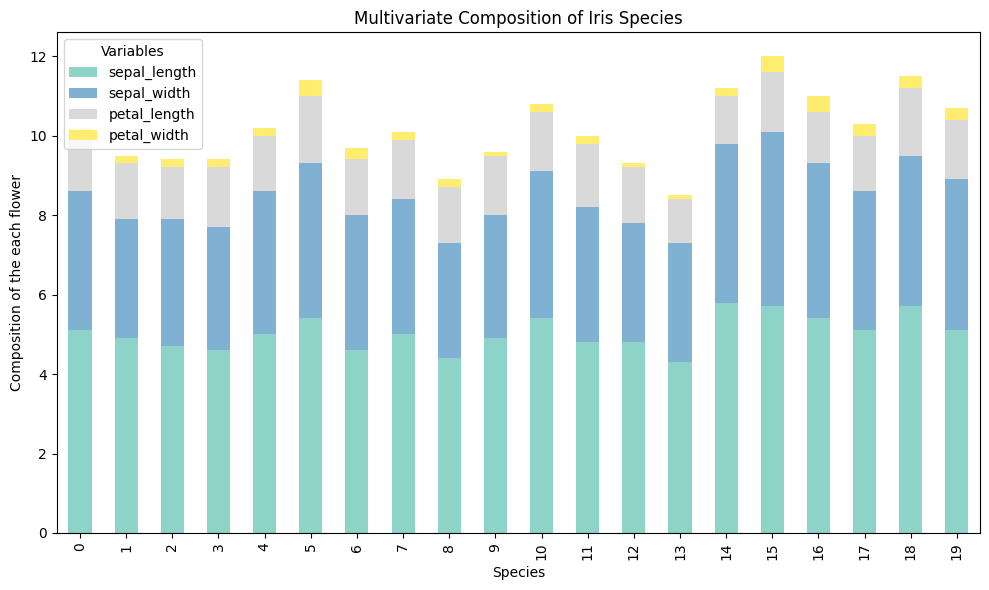

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# Load the Iris dataset
iris = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\iris.csv")
# iris = sns.load_dataset("titanic")

#univariate
sl= iris.groupby("species")["sepal_length"].mean()
plt.pie(sl, labels=sl.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title("Composition of Mean Sepal Length by Species")
plt.show()


#Multivariate
#Reducing the dataset to count of 40
iris = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\iris.csv").head(20)
# Group data by species and calculate the mean of numeric variables
species_data = iris.groupby("species")[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

# Create a stacked bar chart
species_data.plot(kind="bar", stacked=True, colormap="Set3", figsize=(10, 6))

# Set labels and title
plt.title("Multivariate Composition of Iris Species")
plt.xlabel("Species")
plt.ylabel("Composition of the each flower")

# Show the plot
plt.legend(title="Variables", loc="upper left")
plt.tight_layout()
plt.show()

Multivariate Relationship Plot

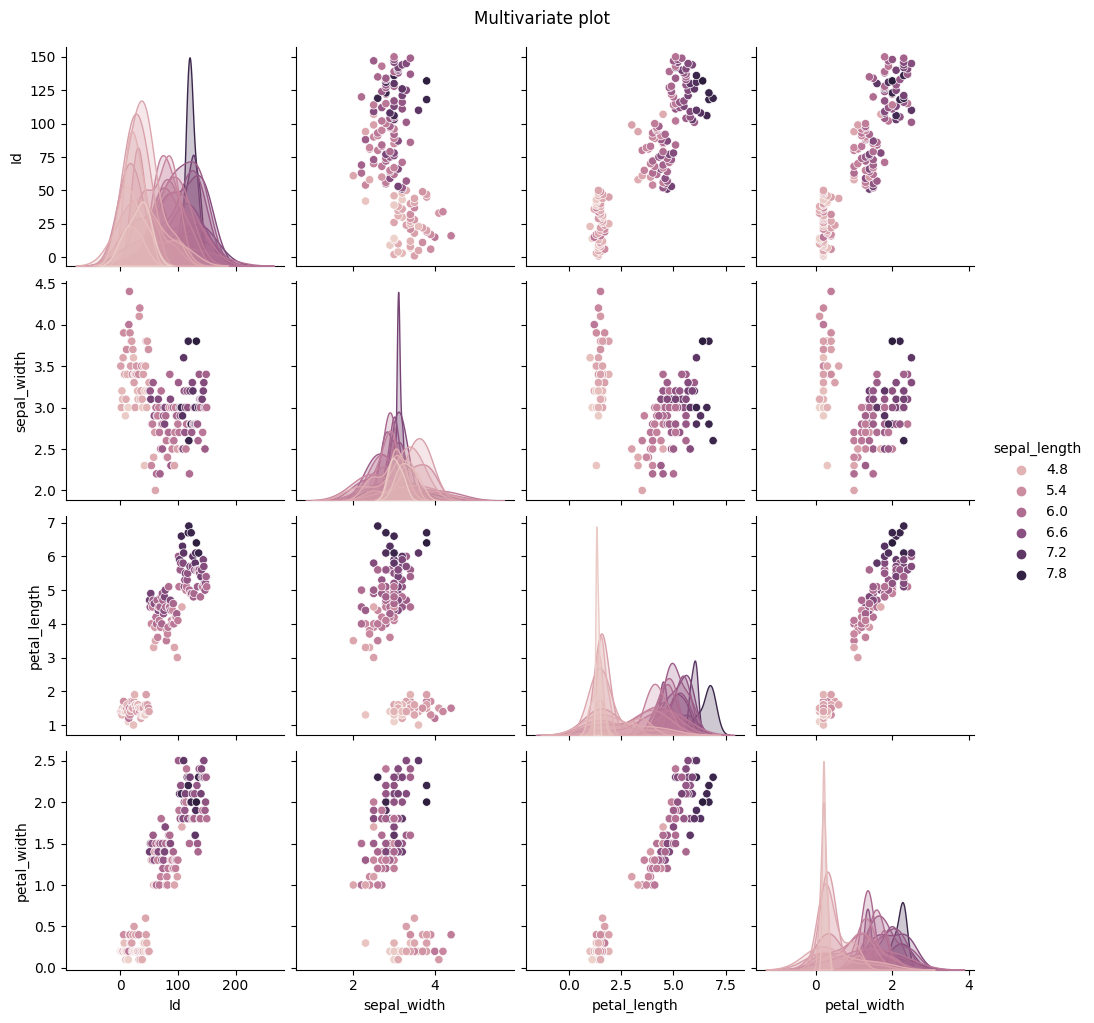

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df = sns.load_dataset('iris')
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\iris.csv") 

# plt.figure(figsize=(24,20))
sns.pairplot(df, hue="sepal_length")
plt.suptitle('Multivariate plot',y=1.02)
plt.show()